# Prediction using Supervised Machine Learning.

Blog link: https://kumawatrohan.medium.com/beginners-guide-to-machine-learning-linear-regression-ab4c30d3ece2

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
#import data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print("No. of rows in the dataset is: " + str(df.shape[0]))
print("No. of columns in the dataset is: " + str(df.shape[1]))

No. of rows in the dataset is: 25
No. of columns in the dataset is: 2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


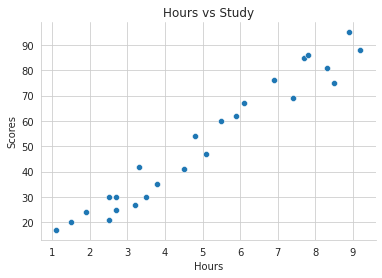

In [5]:
sns.scatterplot(df['Hours'], df['Scores'])
sns.despine()
plt.title("Hours vs Study")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [6]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [8]:
# fitting our model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("Coefficient of our model is: " + str(regressor.coef_[0]))
print("Intercept of our model is: " + str(regressor.intercept_))

Coefficient of our model is: 9.91065648064224
Intercept of our model is: 2.018160041434662


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


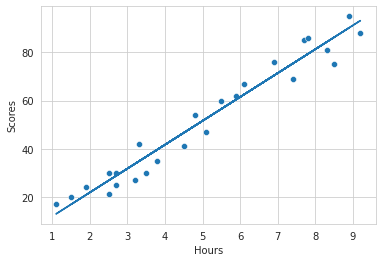

In [10]:
# plot regression line
line = regressor.coef_[0] * X + regressor.intercept_

sns.scatterplot(df['Hours'], df['Scores'])
plt.plot(X, line)
plt.show()

In [11]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [12]:
# Comparing Actual vs Predicted
com = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
com  

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
hour = 9.25
own_pred = regressor.predict(np.array([9.25]).reshape(-1,1))
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [14]:
hour = 15
own_pred = regressor.predict(np.array([15]).reshape(-1,1))
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 15
Predicted Score = 150.67800725106827


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
